In [1]:
import cv2
import os
import numpy as np 
from matplotlib import pyplot as plt
import time
import mediapipe as mp 

In [2]:
mp_holistic = mp.solutions.holistic #holistic model
mp_drawing = mp.solutions.drawing_utils #drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color conversion bgr 2 rgb
    image.flags.writeable = False # image no longer writeable
    results = model.process(image) #make prediction
    image.flags.writeable = True # image  writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #color conversion rgb 2 bgr
    return image, results
    

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image, results):
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [6]:
capture = cv2.VideoCapture(0)
#access mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while capture.isOpened():
        #READ
        ret, frame = capture.read()

        #make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        #draw landmarks
        draw_styled_landmarks(image, results)
        
        #SHOW
        cv2.imshow('Captured Feed', image)
        #BREAK
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    capture.release()
    cv2.destroyAllWindows()

In [7]:
results

mediapipe.python.solution_base.SolutionOutputs

In [8]:
draw_landmarks(frame, results)

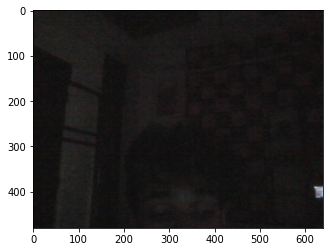

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
def extract_keypoints(results):
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return rh

In [11]:
result_test = extract_keypoints(results)

In [12]:
result_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
np.save('0', result_test)

In [14]:
np.load('0.npy')

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Noice') 

# Actions that we try to detect
actions = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [75]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [76]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass


In [77]:
capture = cv2.VideoCapture(0)
#access mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                
                #READ
                ret, frame = capture.read()
                
                #make detections
                image, results = mediapipe_detection(frame, holistic)
                #print(results)
                
                #draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('Captured Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
        
                #SHOW
                    cv2.imshow('Captured Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                
                #BREAK
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    capture.release()
    cv2.destroyAllWindows()

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [17]:
label_map = {label:num for num, label in enumerate(actions)}

In [18]:
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [19]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [20]:
np.array(sequences).shape

(780, 30, 63)

In [21]:
np.array(labels).shape

(780,)

In [22]:
X = np.array(sequences)

In [23]:
X

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 2.09964305e-01,  5.81457615e-01, -9.20364673e-09, ...,
          2.72677749e-01,  4.17459637e-01, -4.70645241e-02],
        [ 2.17864484e-01,  5.46537995e-01, -6.49056489e-08, ...,
          2.58693606e-01,  3.92823309e-01, -3.07848807e-02],
        [ 2.24607617e-01,  5.12119889e-01, -2.66187499e-07, ...,
          2.56616622e-01,  3.83708984e-01, -2.50737015e-02]],

       [[ 2.32656866e-01,  4.90543783e-01, -2.36984562e-07, ...,
          2.54071862e-01,  3.62978101e-01, -2.15410404e-02],
        [ 2.83992767e-01,  5.27850628e-01, -3.63089470e-07, ...,
          2.76635587e-01,  3.82575601e

In [24]:
X.shape

(780, 30, 63)

In [25]:
y = to_categorical(labels).astype(int)

In [26]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [28]:
X_train.shape

(741, 30, 63)

In [29]:
X_test.shape

(39, 30, 63)

In [30]:
y_train.shape

(741, 26)

In [31]:
y_test.shape

(39, 26)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [35]:
log_dir = os.path.join('Logs')

In [36]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,63)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [37]:
actions.shape[0]

26

In [38]:
res = [0.7, 0.2, 0.1]

In [39]:
actions[np.argmax(res)]

'A'

In [40]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [42]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
24/24 [==============================] - 1s 45ms/step - loss: 3.2261 - categorical_accuracy: 0.0661
Epoch 2/1000
24/24 [==============================] - 1s 39ms/step - loss: 3.0445 - categorical_accuracy: 0.1161
Epoch 3/1000
24/24 [==============================] - 1s 36ms/step - loss: 2.8315 - categorical_accuracy: 0.1619
Epoch 4/1000
24/24 [==============================] - 1s 43ms/step - loss: 2.4456 - categorical_accuracy: 0.2294
Epoch 5/1000
24/24 [==============================] - 1s 45ms/step - loss: 2.1196 - categorical_accuracy: 0.2645 0s - loss: 2.1413 - categorical_
Epoch 6/1000
24/24 [==============================] - 1s 40ms/step - loss: 1.9550 - categorical_accuracy: 0.2915
Epoch 7/1000
24/24 [==============================] - 1s 37ms/step - loss: 1.9521 - categorical_accuracy: 0.3063
Epoch 8/1000
24/24 [==============================] - 1s 38ms/step - loss: 1.9755 - categorical_accuracy: 0.3185
Epoch 9/1000
24/24 [==============================] - 1s 39ms/s

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            32768     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 26)                858       
                                                                 
Total params: 188,090
Trainable params: 188,090
Non-trai

In [44]:
res = model.predict(X_test)

In [45]:
actions[np.argmax(res[5])]

'S'

In [46]:
actions[np.argmax(y_test[5])]


'S'

In [47]:
model.save('action.h5')

In [113]:
del model

In [116]:
model.load_weights('action.h5')

In [48]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [53]:
yhat = model.predict(X_train)


In [54]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [55]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[713,   0],
        [  0,  28]],

       [[713,   0],
        [  0,  28]],

       [[712,   0],
        [  0,  29]],

       [[712,   0],
        [  0,  29]],

       [[713,   0],
        [  0,  28]],

       [[711,   0],
        [  0,  30]],

       [[715,   0],
        [  0,  26]],

       [[711,   0],
        [  0,  30]],

       [[713,   0],
        [  0,  28]],

       [[711,   0],
        [  0,  30]],

       [[714,   0],
        [  0,  27]],

       [[713,   0],
        [  0,  28]],

       [[712,   1],
        [  0,  28]],

       [[712,   0],
        [  0,  29]],

       [[712,   0],
        [  0,  29]],

       [[714,   0],
        [  1,  26]],

       [[711,   0],
        [  0,  30]],

       [[712,   0],
        [  0,  29]],

       [[713,   0],
        [  0,  28]],

       [[711,   0],
        [  0,  30]],

       [[713,   0],
        [  0,  28]],

       [[712,   0],
        [  0,  29]],

       [[713,   0],
        [  0,  28]],

       [[714,   0],
        [  0, 

In [56]:
accuracy_score(ytrue, yhat)

0.9986504723346828

In [57]:
sequence = []
sentence = []
predictions = []
threshold = 0.5
capture = cv2.VideoCapture(0)
#access mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while capture.isOpened():
        #READ
        ret, frame = capture.read()

        #make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        #draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
            
            if len(sentence) > 9: 
                sentence = sentence[-9:]
            
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        #SHOW
        cv2.imshow('Captured Feed', image)
        #BREAK
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    capture.release()
    cv2.destroyAllWindows()

M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
W
W
W
W
O
O
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
B
B
B
B
B
B
B
B
B
B
B
B
B
B
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
R
R
R
R
R
R
P
P
P
P
P
P
P
P
P
P
P
P
U
V
V
V
V
V
V
V
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
V
V
V
V
V
V
V
V
V
V
U
U
R
R
R
S
S
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
S
S
S
S
S
S
S
S
S
S
S
E
E
E
E
E
E
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
R
R
R
R
Q
Q
Q
M
